In [38]:
import os
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://pngimg.com/uploads/face/face_PNG5669.png')
img = Image.open(BytesIO(response.content))

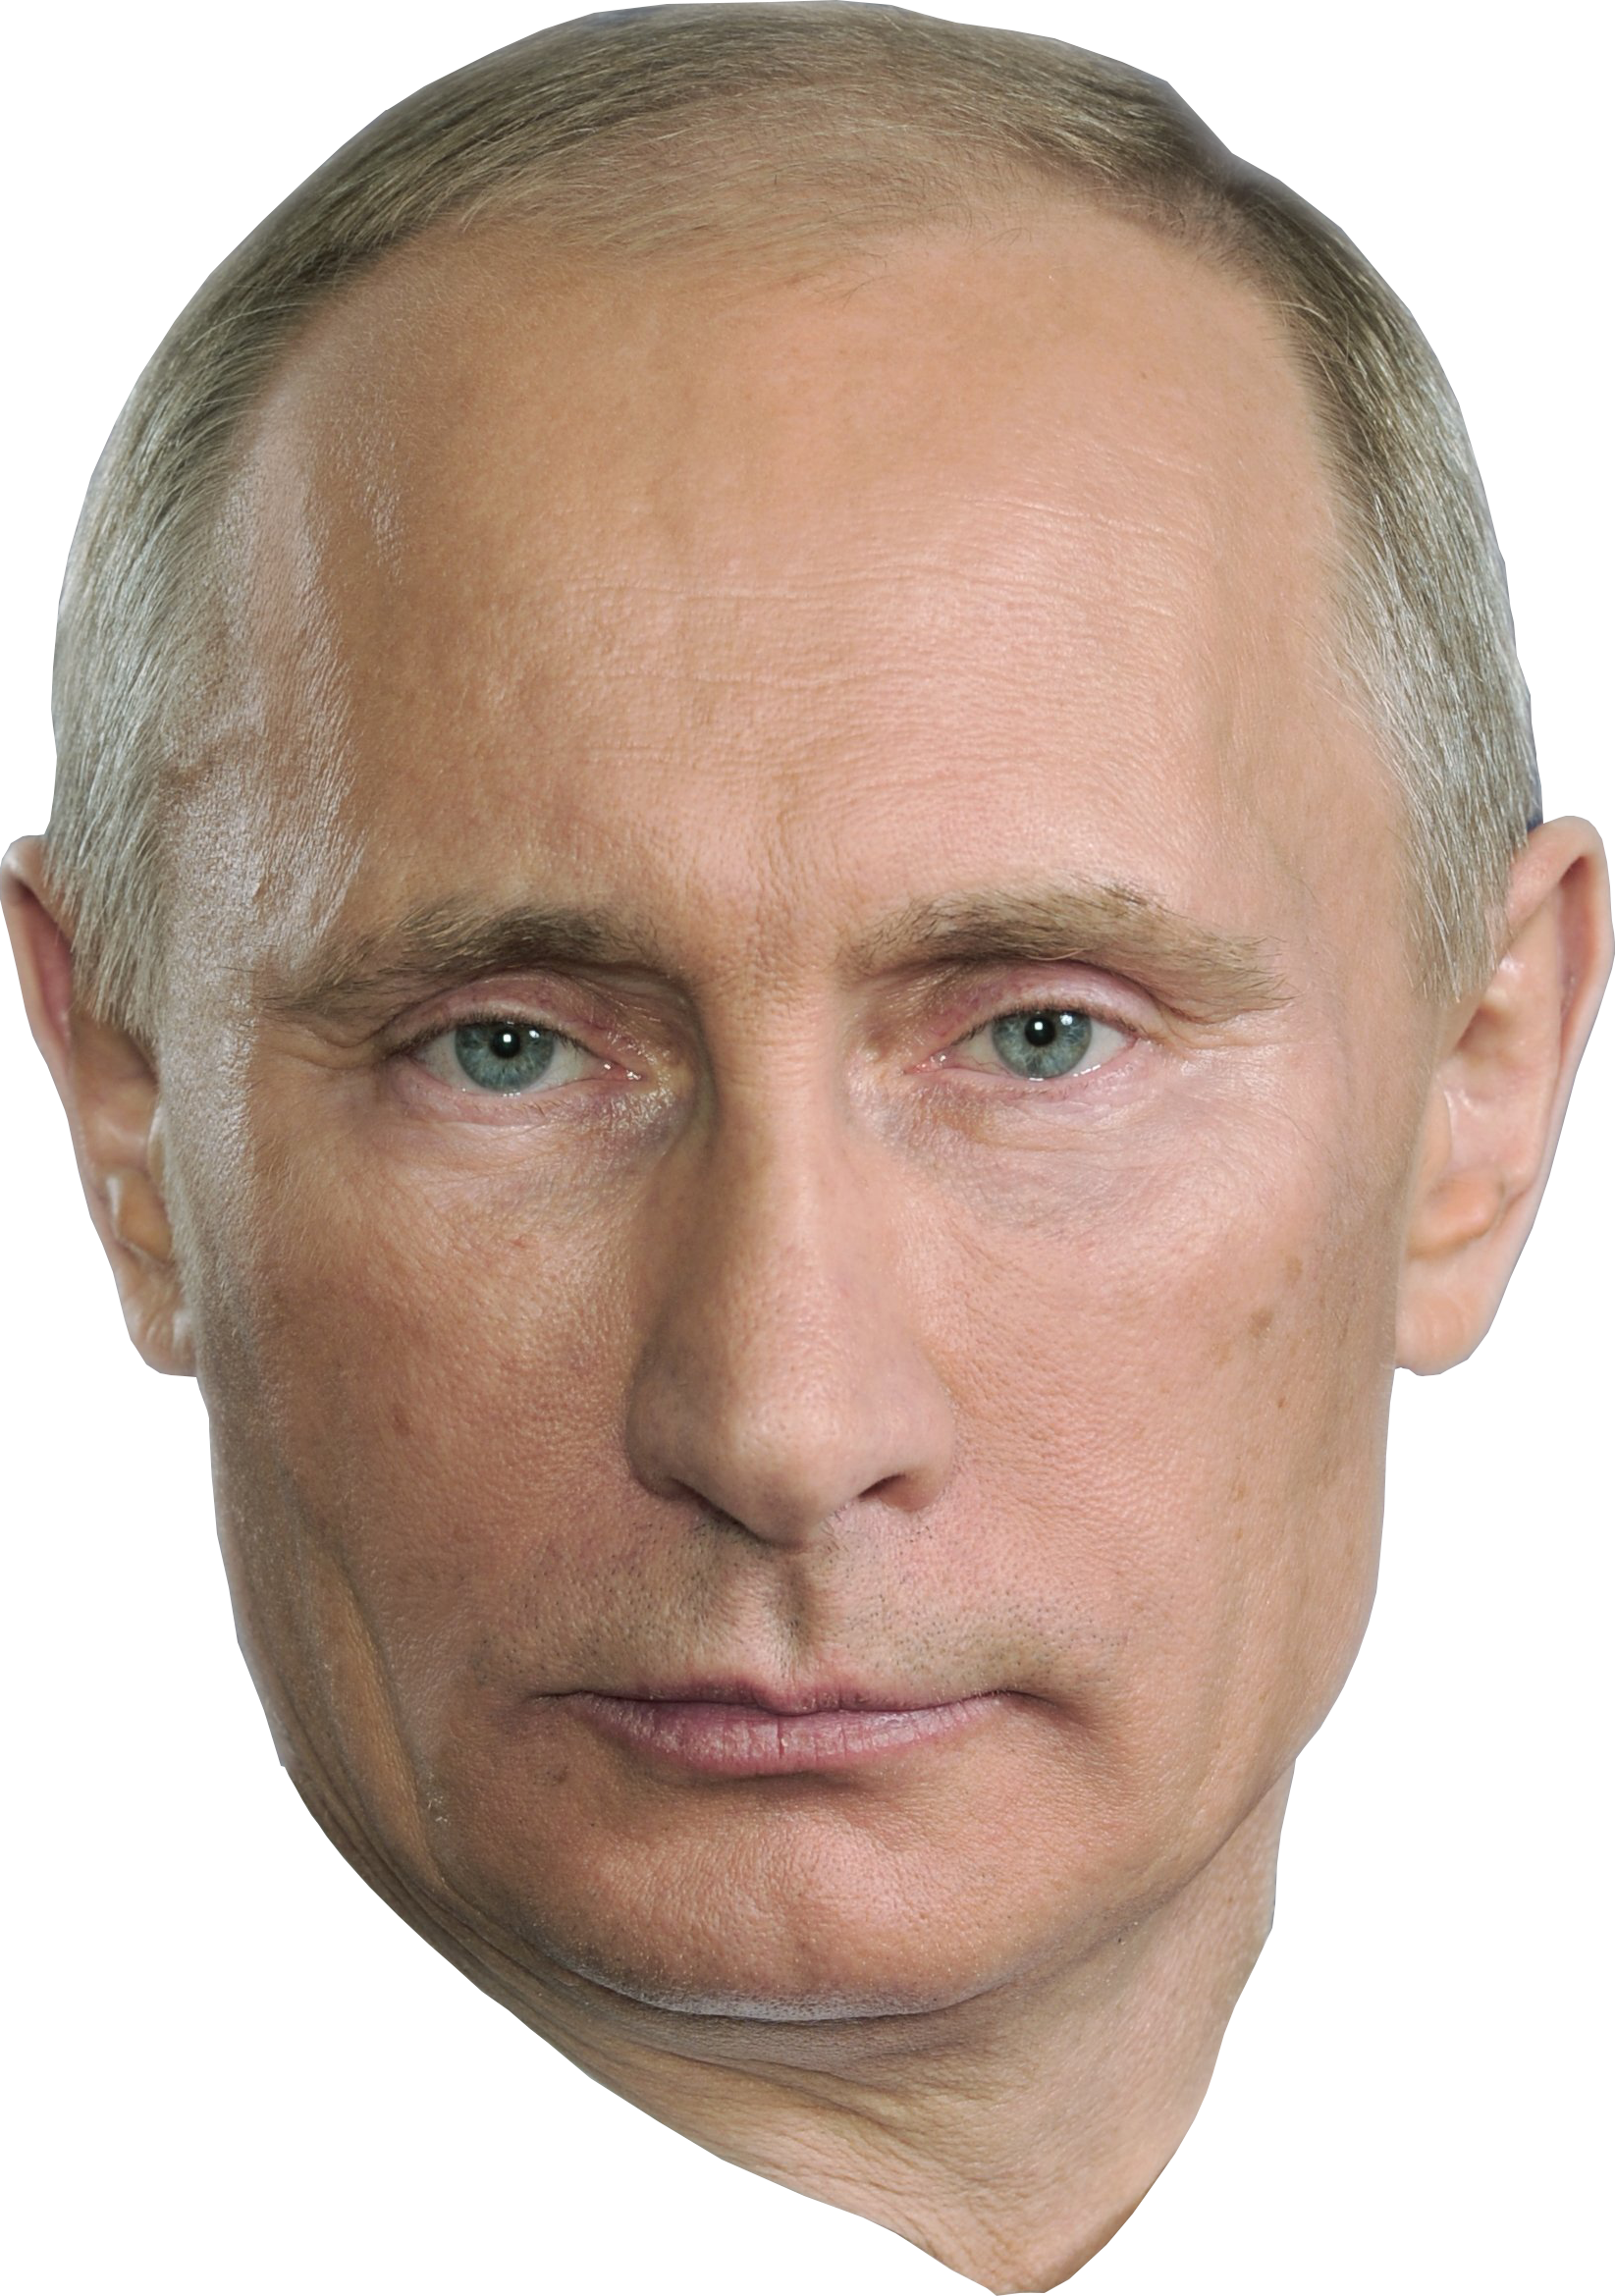

In [39]:
img

In [40]:
import numpy as np

In [41]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [42]:
gray = rgb2gray(np.array(img))

In [43]:
from matplotlib import pyplot as plt

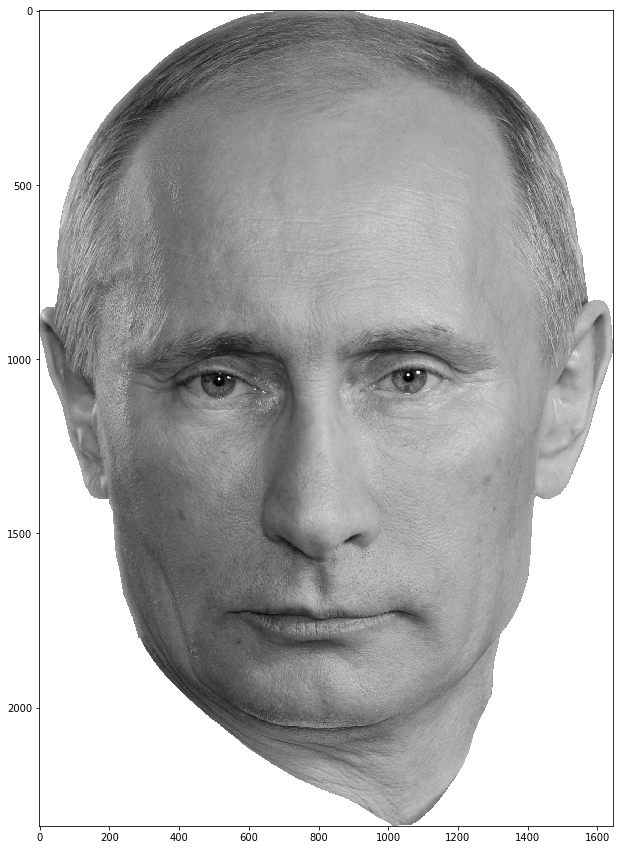

In [44]:
plt.figure(figsize=(15,15))
plt.imshow(gray,cmap='gray')

In [72]:
U, sigma, V = np.linalg.svd(gray)
back_img = U[:,:100]@np.eye(100)*sigma[:100]@V[:100,:]

In [73]:
gray.shape

(2339, 1645)

In [74]:
U.shape, sigma.shape, V.shape

((2339, 2339), (1645,), (1645, 1645))

In [75]:
2339*2 + 2 + 2*1645

7970

In [76]:
(2339*10 + 10 + 10*1645)/(gray.shape[0] * gray.shape[1])

0.010356957679417723

In [77]:
back_img.shape

(2339, 1645)

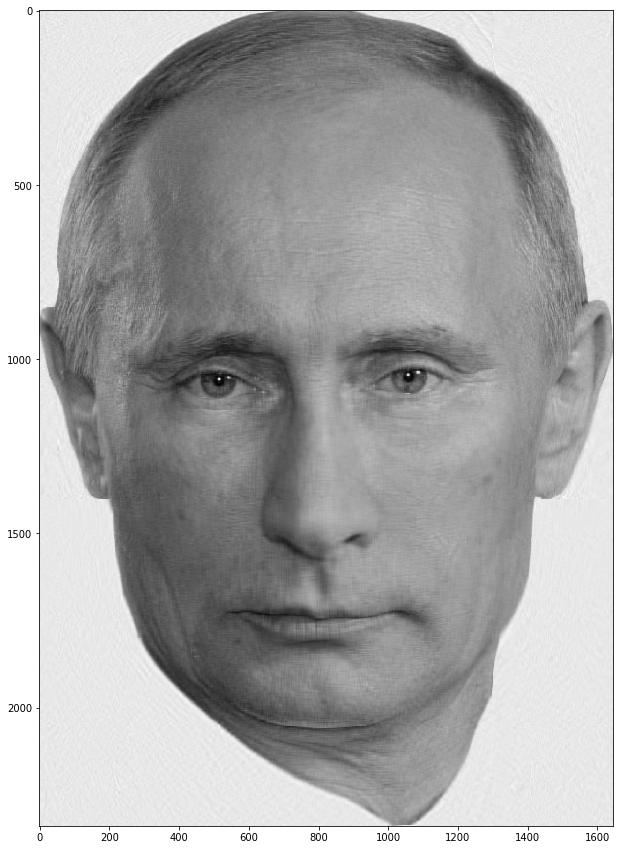

In [78]:
plt.figure(figsize=(15,15))
plt.imshow(back_img,cmap='gray')